In [6]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import postProcess.pyCompute as pyCompute
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
import json
import proplot as plot
import concurrent.futures

## Cases Info 

In [7]:
case_T573="../../T573_Pe1e-3_modifiedRPM/"
case_T673="../../T673_Pe1e-3_modifiedRPM/"
case_T773="../../T773_Pe1e-3/"
case_T873="../../T873_Pe1e-3/"

data_folder="postProcess"
save_folder="postProcess/images"
transverse_data_folder="postProcess/transverseAveragedData"

In [8]:
max_t_case_T573=str(list(np.sort([float(i) for i in pyFigure.get_times_from_data_folder(os.path.join(case_T573,transverse_data_folder))]))[-1])
print(f"max time of case_T573: {max_t_case_T573}")

max_t_case_T673=str(list(np.sort([float(i) for i in pyFigure.get_times_from_data_folder(os.path.join(case_T673,transverse_data_folder))]))[-1])
print(f"max time of case_T673: {max_t_case_T673}")

max_t_case_T773=str(list(np.sort([float(i) for i in pyFigure.get_times_from_data_folder(os.path.join(case_T773,transverse_data_folder))]))[-1])
print(f"max time of case_T773: {max_t_case_T773}")

max_t_case_T873=str(list(np.sort([float(i) for i in pyFigure.get_times_from_data_folder(os.path.join(case_T873,transverse_data_folder))]))[-1])
print(f"max time of case_T873: {max_t_case_T873}")


max time of case_T573: 62.51
max time of case_T673: 22.65
max time of case_T773: 20.51
max time of case_T873: 19.01


In [9]:
TMax_file_case_T573="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T573_Pe1e-3_modifiedRPM/postProcessing/minMaxComponents/0.01/fieldMinMax.dat"
TMax_file_case_T673="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T673_Pe1e-3_modifiedRPM/postProcessing/minMaxComponents/0.15/fieldMinMax_0.1500012.dat"
TMax_file_case_T773="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe1e-3/postProcessing/minMaxComponents/0.01/fieldMinMax.dat"
TMax_file_case_T873="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T873_Pe1e-3/postProcessing/minMaxComponents/0.01/fieldMinMax.dat"

## Maximum Temperature with time

### Max Point Temperature

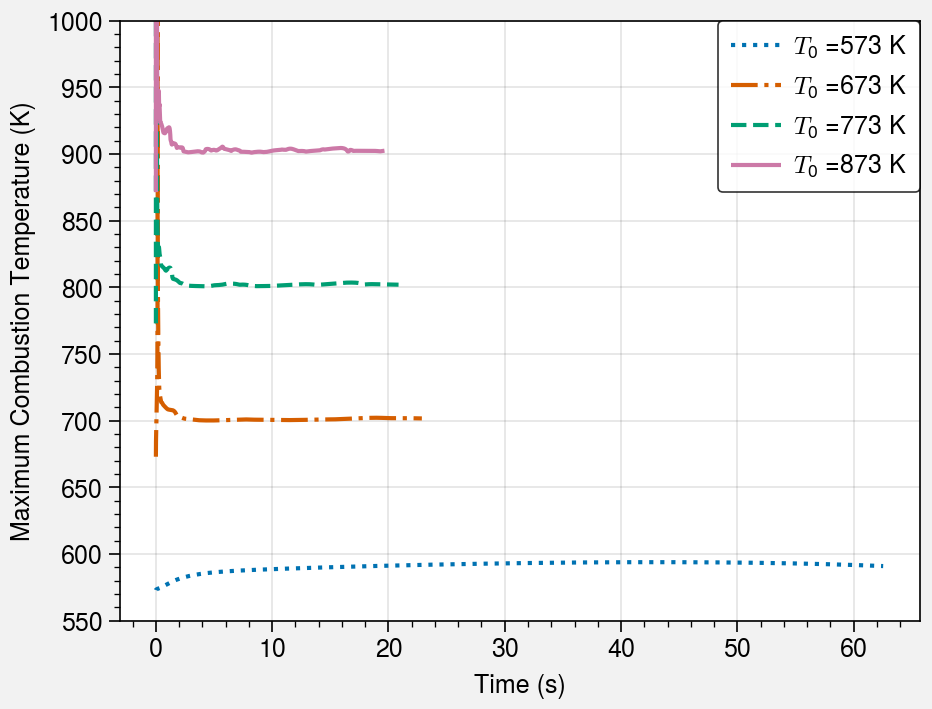

In [40]:
sampling_rate=100
df_maxT_case_T573=pyFigure.read_min_max_field(TMax_file_case_T573,sampling_rate,'T')
df_maxT_case_T673=pyFigure.read_min_max_field(TMax_file_case_T673,sampling_rate,'T')
df_maxT_case_T773=pyFigure.read_min_max_field(TMax_file_case_T773,sampling_rate,'T')
df_maxT_case_T873=pyFigure.read_min_max_field(TMax_file_case_T873,sampling_rate,'T')

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.plot(df_maxT_case_T573["Time"],df_maxT_case_T573["max"],label="$\mathit{T}_{0}$ =573 K",ls=":")

ax.plot(df_maxT_case_T673["Time"],df_maxT_case_T673["max"],label="$\mathit{T}_{0}$ =673 K",ls="-.")

ax.plot(df_maxT_case_T773["Time"],df_maxT_case_T773["max"],label="$\mathit{T}_{0}$ =773 K",ls="--")

ax.plot(df_maxT_case_T873["Time"],df_maxT_case_T873["max"],label="$\mathit{T}_{0}$ =873 K",ls="-")

ax.legend(loc="upper right", ncol=1, fancybox=True)
ax.format( xlabel="Time (s)",
           ylabel="Maximum Combustion Temperature (K)", ylim=(550,1000))
fig.savefig('./MaximumPointTemperature.jpg', dpi=600)

In [42]:
max_component_file_case_T573="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T573_Pe1e-3_modifiedRPM/postProcessing/minMaxComponents2/62.51/fieldMinMax.dat"
max_component_file_case_T673="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T673_Pe1e-3_modifiedRPM/postProcessing/minMaxComponents2/22.65/fieldMinMax.dat"
max_component_file_case_T773="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe1e-3/postProcessing/minMaxComponents2/20.51/fieldMinMax.dat"
max_component_file_case_T873="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T873_Pe1e-3/postProcessing/minMaxComponents2/19.01/fieldMinMax.dat"

df_combined_case_T573=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(max_component_file_case_T573,os.path.join(case_T573,transverse_data_folder))

df_combined_case_T673=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(max_component_file_case_T673,os.path.join(case_T673,transverse_data_folder))

df_combined_case_T773=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(max_component_file_case_T773,os.path.join(case_T773,transverse_data_folder))

df_combined_case_T873=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(max_component_file_case_T873,os.path.join(case_T873,transverse_data_folder))

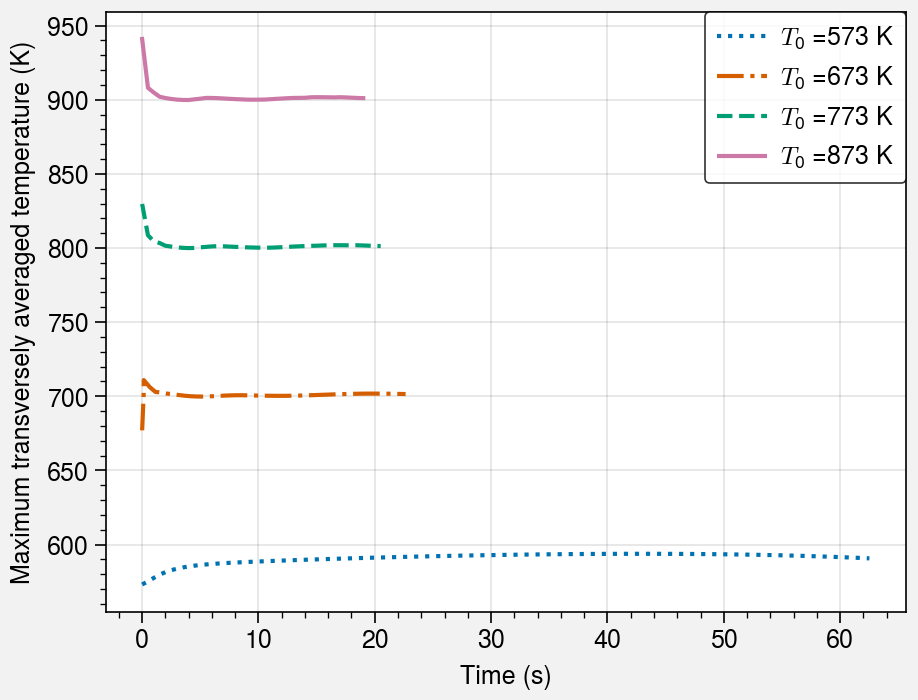

In [44]:
fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.plot(df_combined_case_T573["Time"],df_combined_case_T573["Transverse_Tmax"],label="$\mathit{T}_{0}$ =573 K",ls=":")

ax.plot(df_combined_case_T673["Time"],df_combined_case_T673["Transverse_Tmax"],label="$\mathit{T}_{0}$ =673 K",ls="-.")

ax.plot(df_combined_case_T773["Time"],df_combined_case_T773["Transverse_Tmax"],label="$\mathit{T}_{0}$ =773 K",ls="--")

ax.plot(df_combined_case_T873["Time"],df_combined_case_T873["Transverse_Tmax"],label="$\mathit{T}_{0}$ =873 K",ls="-")

ax.legend(loc="upper right", ncol=1, fancybox=True)
ax.format( xlabel="Time (s)",
           ylabel="Maximum transversely averaged temperature (K)", )
fig.savefig('./MaximumTransverselyAveragedTemperature.jpg', dpi=600)

### comments
1. With the Pe of 1e-3, the combustion temperature is stable no matter the firing temperature
2. The combustion temperature at the firing stage increase greatly with the case of higher firing temperature due to intensive coke combustion at the inlet due to strong O2 diffusive flux. But for the cases with the firing temperature of 673K and 573K, this temperature increase is not observed 

## reaction rate with firing temperature

In [13]:
df_rate_case_T573=pd.read_csv(os.path.join(case_T573,"postProcess/others/ReactionRateAndBurningRate.csv"))
df_rate_case_T673=pd.read_csv(os.path.join(case_T673,"postProcess/others/ReactionRateAndBurningRate.csv"))
df_rate_case_T773=pd.read_csv(os.path.join(case_T773,"postProcess/others/ReactionRateAndBurningRate.csv"))
df_rate_case_T873=pd.read_csv(os.path.join(case_T873,"postProcess/others/ReactionRateAndBurningRate.csv"))

coke_rate_case_T573=list(df_rate_case_T573[df_rate_case_T573["time"]==float(max_t_case_T573)]["vol_averaged_reaction_rate"])[0]
coke_rate_case_T673=list(df_rate_case_T673[df_rate_case_T673["time"]==float(max_t_case_T673)]["vol_averaged_reaction_rate"])[0]
coke_rate_case_T773=list(df_rate_case_T773[df_rate_case_T773["time"]==float(max_t_case_T773)]["vol_averaged_reaction_rate"])[0]
coke_rate_case_T873=list(df_rate_case_T873[df_rate_case_T873["time"]==float(max_t_case_T873)]["vol_averaged_reaction_rate"])[0]

T=[573,673,773,873]
coke_rates=[coke_rate_case_T573,coke_rate_case_T673,coke_rate_case_T773,coke_rate_case_T873]

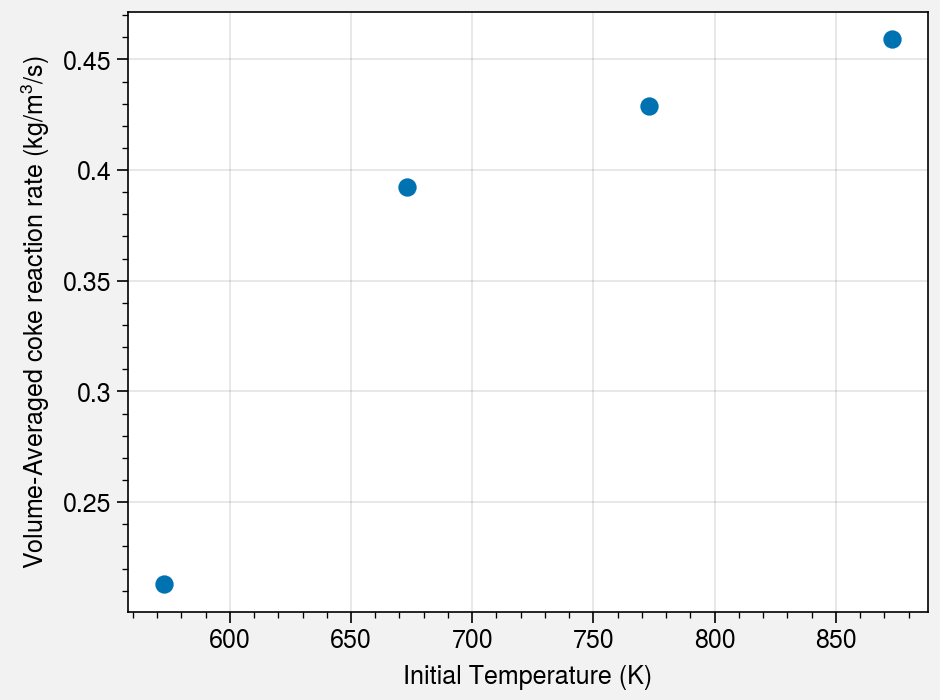

In [14]:
fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.scatter(T,coke_rates)
ax.format(xlabel="Initial Temperature (K)",
          ylabel="Volume-Averaged coke reaction rate (kg/m$^3$/s)")
fig.savefig('./cokeReactionRate~T.jpg', dpi=600)         

In [15]:
pixelResolution=0.5e-6
DO2=7.63596e-6

def process_df_O2_flux(df_O2_flux_at_inlet,DO2=7.63596e-6,pixelResolution=0.5e-6):
    df_O2_flux_at_inlet["diffusive_flux"]=np.array(df_O2_flux_at_inlet["O2_diffusive_Flux_By_DO2"])*DO2
    df_O2_flux_at_inlet["advective_flux"]=np.array(df_O2_flux_at_inlet["O2_adv_flux_by_deltaX"])*pixelResolution
    df_O2_flux_at_inlet["total_flux"]=df_O2_flux_at_inlet["diffusive_flux"]+df_O2_flux_at_inlet["advective_flux"]
    return df_O2_flux_at_inlet

In [16]:
df_O2_flux_at_inlet_case_T573=pd.read_csv(os.path.join(case_T573,"postProcess/others/O2FluxsAtInlet.csv"))
df_O2_flux_at_inlet_case_T673=pd.read_csv(os.path.join(case_T673,"postProcess/others/O2FluxsAtInlet.csv"))
df_O2_flux_at_inlet_case_T773=pd.read_csv(os.path.join(case_T773,"postProcess/others/O2FluxsAtInlet.csv"))
df_O2_flux_at_inlet_case_T873=pd.read_csv(os.path.join(case_T873,"postProcess/others/O2FluxsAtInlet.csv"))

df_O2_flux_at_inlet_case_T573=process_df_O2_flux(df_O2_flux_at_inlet_case_T573,DO2 =4.87334E-06)
df_O2_flux_at_inlet_case_T673=process_df_O2_flux(df_O2_flux_at_inlet_case_T673,DO2=6.20322E-06)
df_O2_flux_at_inlet_case_T773=process_df_O2_flux(df_O2_flux_at_inlet_case_T773,DO2=7.63596e-6)
df_O2_flux_at_inlet_case_T873=process_df_O2_flux(df_O2_flux_at_inlet_case_T873,DO2=9.16465E-06)




In [17]:
total_O2_flux_case_T573=list(df_O2_flux_at_inlet_case_T573[df_O2_flux_at_inlet_case_T573["time"]==float(max_t_case_T573)]["total_flux"])[0]
total_O2_flux_case_T673=list(df_O2_flux_at_inlet_case_T673[df_O2_flux_at_inlet_case_T673["time"]==float(max_t_case_T673)]["total_flux"])[0]
total_O2_flux_case_T773=list(df_O2_flux_at_inlet_case_T773[df_O2_flux_at_inlet_case_T773["time"]==float(max_t_case_T773)]["total_flux"])[0]
total_O2_flux_case_T873=list(df_O2_flux_at_inlet_case_T873[df_O2_flux_at_inlet_case_T873["time"]==float(max_t_case_T873)]["total_flux"])[0]

total_O2_fluxs=[total_O2_flux_case_T573,total_O2_flux_case_T673,total_O2_flux_case_T773,total_O2_flux_case_T873]

O2Fraction=0.22
rhoST=1.2758
area=1*1200*pixelResolution #z 1m 
total_O2_flux_ST_volume=[ flux/O2Fraction/rhoST/area*60 for flux in total_O2_fluxs] #m3 (ST)/(m2 min) 


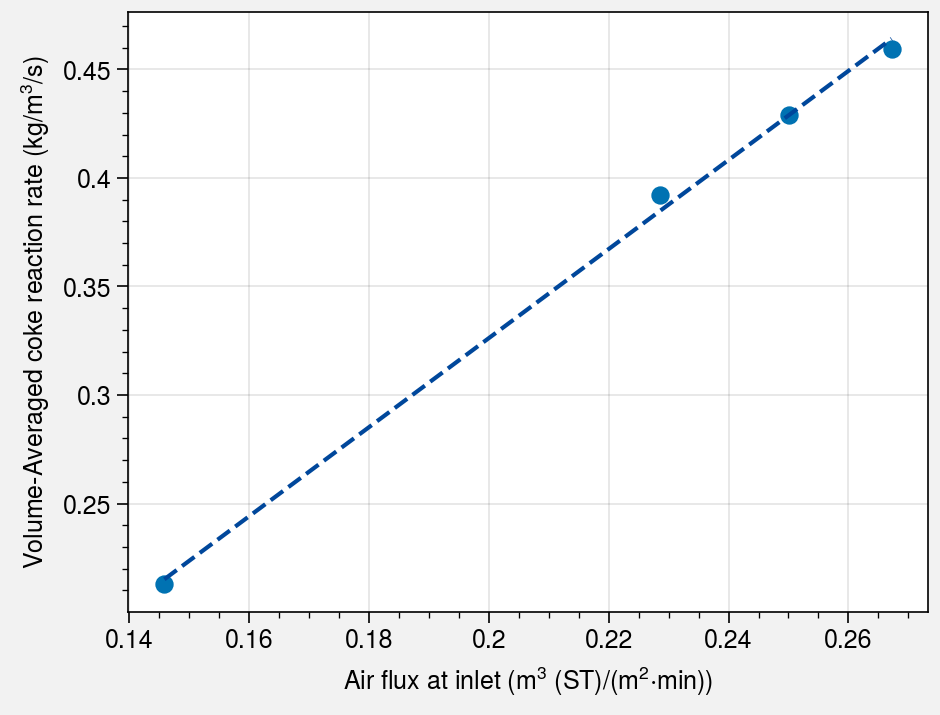

In [18]:
fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.scatter(total_O2_flux_ST_volume,coke_rates)
ax.format(xlabel="Air flux at inlet (m$^3$ (ST)/(m$^2$$\cdot$min))",
          ylabel="Volume-Averaged coke reaction rate (kg/m$^3$/s)")

coef = np.polyfit(total_O2_flux_ST_volume,coke_rates,1)
poly1d_fn = np.poly1d(coef) 
ax.plot(total_O2_flux_ST_volume,poly1d_fn(total_O2_flux_ST_volume),ls="--",color=plot.scale_luminance('cerulean', 0.5))

fig.savefig('./cokeReactionRate~AirFlux.jpg', dpi=600)

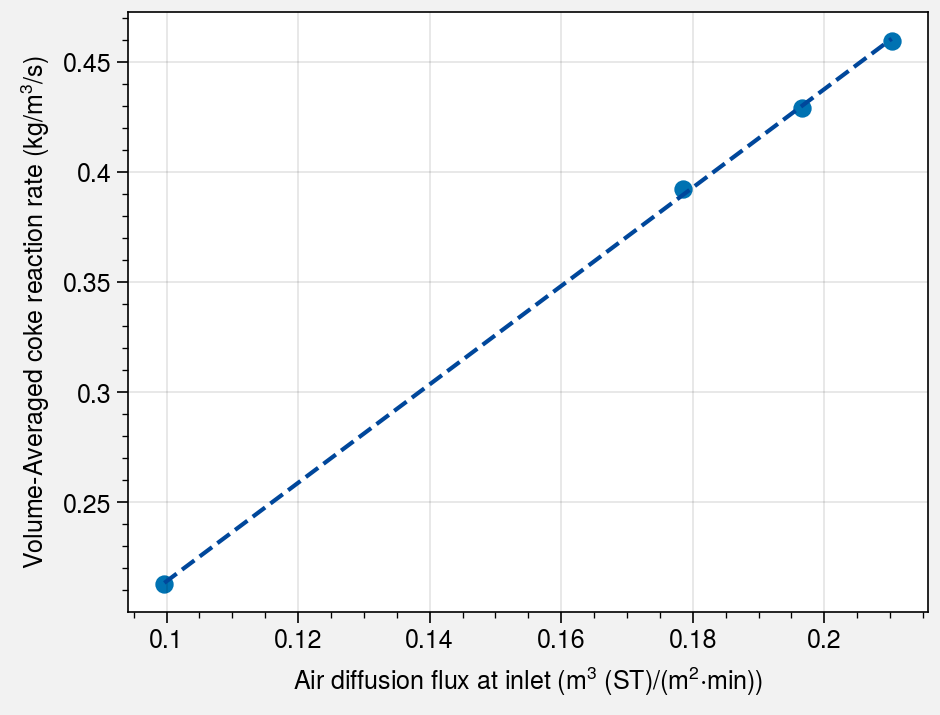

In [19]:
diffusive_O2_flux_case_T573=list(df_O2_flux_at_inlet_case_T573[df_O2_flux_at_inlet_case_T573["time"]==float(max_t_case_T573)]["diffusive_flux"])[0]
diffusive_O2_flux_case_T673=list(df_O2_flux_at_inlet_case_T673[df_O2_flux_at_inlet_case_T673["time"]==float(max_t_case_T673)]["diffusive_flux"])[0]
diffusive_O2_flux_case_T773=list(df_O2_flux_at_inlet_case_T773[df_O2_flux_at_inlet_case_T773["time"]==float(max_t_case_T773)]["diffusive_flux"])[0]
diffusive_O2_flux_case_T873=list(df_O2_flux_at_inlet_case_T873[df_O2_flux_at_inlet_case_T873["time"]==float(max_t_case_T873)]["diffusive_flux"])[0]

diffusive_O2_fluxs=[diffusive_O2_flux_case_T573,diffusive_O2_flux_case_T673,diffusive_O2_flux_case_T773,diffusive_O2_flux_case_T873]

O2Fraction=0.22
rhoST=1.2758
area=1*1200*pixelResolution #z 1m 
diffusive_O2_flux_ST_volume=[ flux/O2Fraction/rhoST/area*60 for flux in diffusive_O2_fluxs] #m3 (ST)/(m2 min) 

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.scatter(diffusive_O2_flux_ST_volume,coke_rates)

coef = np.polyfit(diffusive_O2_flux_ST_volume,coke_rates,1)
poly1d_fn = np.poly1d(coef) 
ax.plot(diffusive_O2_flux_ST_volume,poly1d_fn(diffusive_O2_flux_ST_volume),ls="--",color=plot.scale_luminance('cerulean', 0.5))

ax.format(xlabel="Air diffusion flux at inlet (m$^3$ (ST)/(m$^2$$\cdot$min))",
          ylabel="Volume-Averaged coke reaction rate (kg/m$^3$/s)")
fig.savefig('./cokeReactionRate~AirdiffusionFlux.jpg', dpi=600)


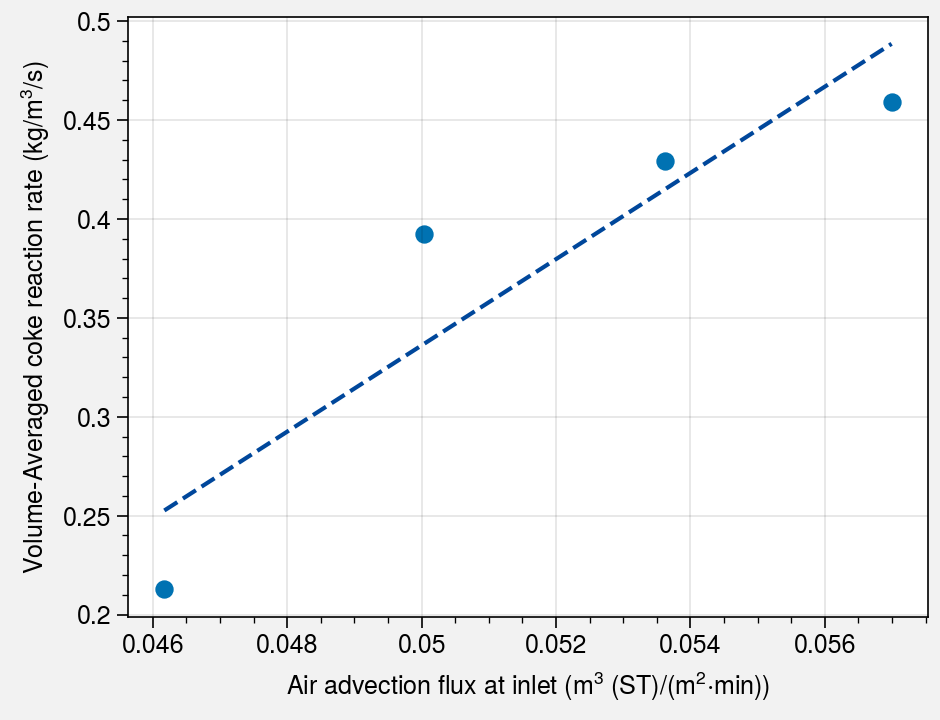

In [20]:
advective_O2_flux_case_T573=list(df_O2_flux_at_inlet_case_T573[df_O2_flux_at_inlet_case_T573["time"]==float(max_t_case_T573)]["advective_flux"])[0]
advective_O2_flux_case_T673=list(df_O2_flux_at_inlet_case_T673[df_O2_flux_at_inlet_case_T673["time"]==float(max_t_case_T673)]["advective_flux"])[0]
advective_O2_flux_case_T773=list(df_O2_flux_at_inlet_case_T773[df_O2_flux_at_inlet_case_T773["time"]==float(max_t_case_T773)]["advective_flux"])[0]
advective_O2_flux_case_T873=list(df_O2_flux_at_inlet_case_T873[df_O2_flux_at_inlet_case_T873["time"]==float(max_t_case_T873)]["advective_flux"])[0]

advective_O2_fluxs=[advective_O2_flux_case_T573,advective_O2_flux_case_T673,advective_O2_flux_case_T773,advective_O2_flux_case_T873]

O2Fraction=0.22
rhoST=1.2758
area=1*1200*pixelResolution #z 1m 
advective_O2_flux_ST_volume=[ flux/O2Fraction/rhoST/area*60 for flux in advective_O2_fluxs] #m3 (ST)/(m2 min) 

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.scatter(advective_O2_flux_ST_volume,coke_rates)

coef = np.polyfit(advective_O2_flux_ST_volume,coke_rates,1)
poly1d_fn = np.poly1d(coef) 
ax.plot(advective_O2_flux_ST_volume,poly1d_fn(advective_O2_flux_ST_volume),ls="--",color=plot.scale_luminance('cerulean', 0.5))

ax.format(xlabel="Air advection flux at inlet (m$^3$ (ST)/(m$^2$$\cdot$min))",
          ylabel="Volume-Averaged coke reaction rate (kg/m$^3$/s)")
fig.savefig('./cokeReactionRate~AirAdvectionFlux.jpg', dpi=600)


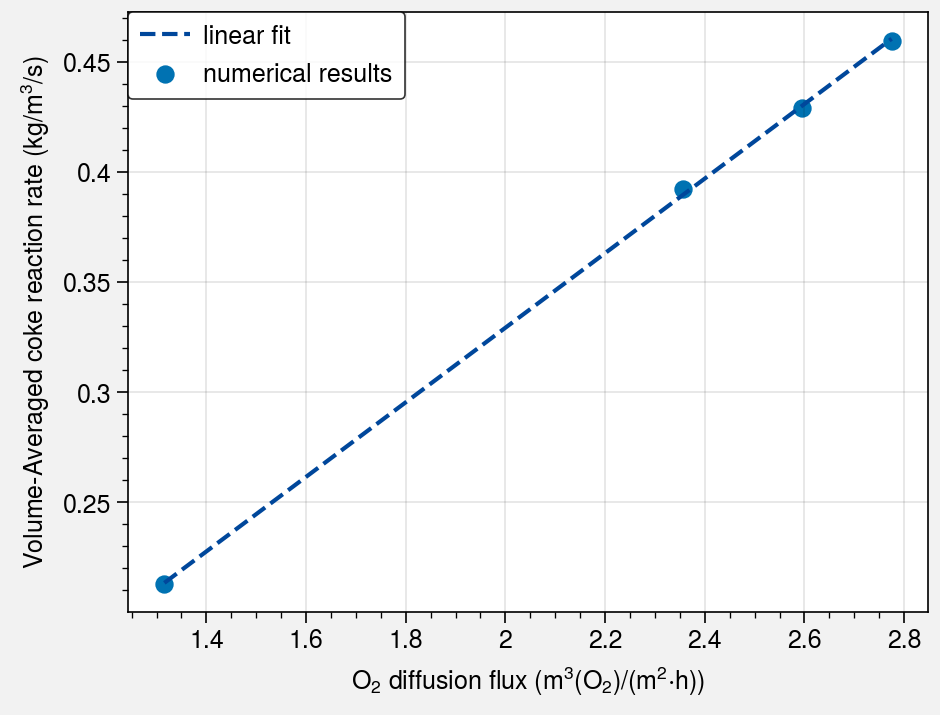

In [32]:
diffusive_O2_flux_case_T573=list(df_O2_flux_at_inlet_case_T573[df_O2_flux_at_inlet_case_T573["time"]==float(max_t_case_T573)]["diffusive_flux"])[0]
diffusive_O2_flux_case_T673=list(df_O2_flux_at_inlet_case_T673[df_O2_flux_at_inlet_case_T673["time"]==float(max_t_case_T673)]["diffusive_flux"])[0]
diffusive_O2_flux_case_T773=list(df_O2_flux_at_inlet_case_T773[df_O2_flux_at_inlet_case_T773["time"]==float(max_t_case_T773)]["diffusive_flux"])[0]
diffusive_O2_flux_case_T873=list(df_O2_flux_at_inlet_case_T873[df_O2_flux_at_inlet_case_T873["time"]==float(max_t_case_T873)]["diffusive_flux"])[0]

diffusive_O2_fluxs=[diffusive_O2_flux_case_T573,diffusive_O2_flux_case_T673,diffusive_O2_flux_case_T773,diffusive_O2_flux_case_T873]

O2Fraction=0.22
rhoST=1.2758
area=1*1200*pixelResolution #z 1m 
diffusive_O2_flux_ST_volume=[ flux/rhoST/area*60*60 for flux in diffusive_O2_fluxs] #m3 (ST)/(m2 h) 

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.scatter(diffusive_O2_flux_ST_volume,coke_rates,label="numerical results")

coef = np.polyfit(diffusive_O2_flux_ST_volume,coke_rates,1)
poly1d_fn = np.poly1d(coef) 
ax.plot(diffusive_O2_flux_ST_volume,poly1d_fn(diffusive_O2_flux_ST_volume),ls="--",color=plot.scale_luminance('cerulean', 0.5), label="linear fit")

# coef2 = np.polyfit(advective_O2_flux_ST_volume,coke_rates,1)
# poly1d_fn2 = np.poly1d(coef2) 
# ax.plot(advective_O2_flux_ST_volume,poly1d_fn2(advective_O2_flux_ST_volume),ls="-.",color=plot.scale_luminance('red', 0.5))
ax.legend(fancybox=True,ncol=1)

ax.format(xlabel="O$_2$ diffusion flux (m$^3$(O$_2$)/(m$^2$$\cdot$h))",
          ylabel="Volume-Averaged coke reaction rate (kg/m$^3$/s)")
fig.savefig('./cokeReactionRate~O2diffusionFlux.jpg', dpi=600)


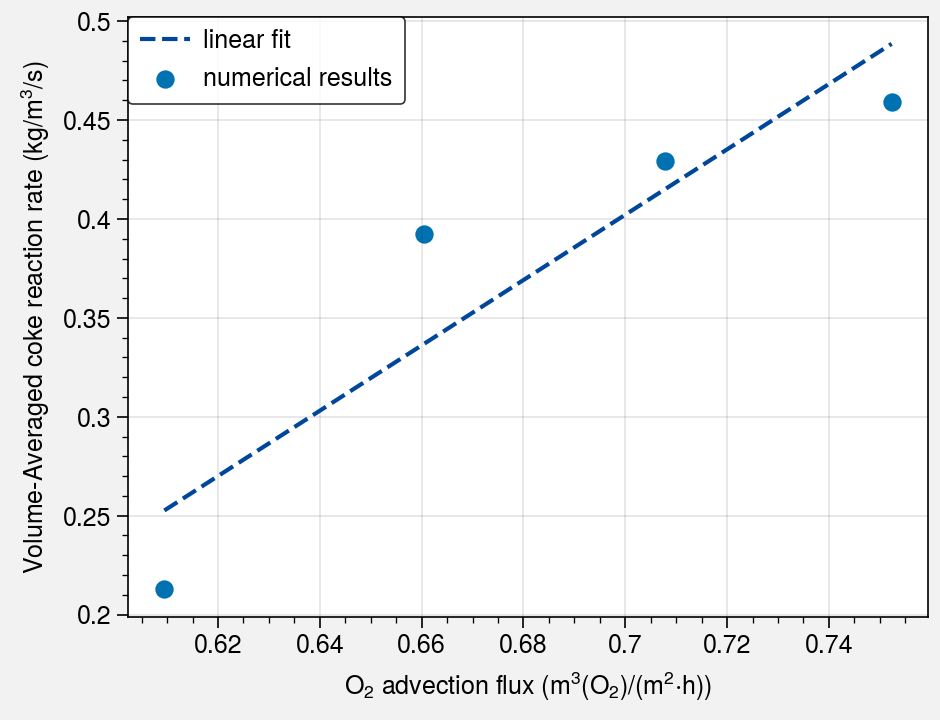

In [33]:
advective_O2_flux_case_T573=list(df_O2_flux_at_inlet_case_T573[df_O2_flux_at_inlet_case_T573["time"]==float(max_t_case_T573)]["advective_flux"])[0]
advective_O2_flux_case_T673=list(df_O2_flux_at_inlet_case_T673[df_O2_flux_at_inlet_case_T673["time"]==float(max_t_case_T673)]["advective_flux"])[0]
advective_O2_flux_case_T773=list(df_O2_flux_at_inlet_case_T773[df_O2_flux_at_inlet_case_T773["time"]==float(max_t_case_T773)]["advective_flux"])[0]
advective_O2_flux_case_T873=list(df_O2_flux_at_inlet_case_T873[df_O2_flux_at_inlet_case_T873["time"]==float(max_t_case_T873)]["advective_flux"])[0]

advective_O2_fluxs=[advective_O2_flux_case_T573,advective_O2_flux_case_T673,advective_O2_flux_case_T773,advective_O2_flux_case_T873]

O2Fraction=0.22
rhoST=1.2758
area=1*1200*pixelResolution #z 1m 
advective_O2_flux_ST_volume=[ flux/rhoST/area*60*60 for flux in advective_O2_fluxs] #m3 (ST)/(m2 h) 

fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
ax.scatter(advective_O2_flux_ST_volume,coke_rates,label="numerical results")

coef = np.polyfit(advective_O2_flux_ST_volume,coke_rates,1)
poly1d_fn = np.poly1d(coef) 
ax.plot(advective_O2_flux_ST_volume,poly1d_fn(advective_O2_flux_ST_volume),ls="--",color=plot.scale_luminance('cerulean', 0.5), label="linear fit")

ax.legend(fancybox=True,ncol=1)


ax.format(xlabel="O$_2$ advection flux (m$^3$(O$_2$)/(m$^2$$\cdot$h))",
          ylabel="Volume-Averaged coke reaction rate (kg/m$^3$/s)")
fig.savefig('./cokeReactionRate~O2AdvectionFlux.jpg', dpi=600)


### Comments 
1. Almost linear with the diffusion flux, confirming the mechanism is the diffusion limited

### Combustion front behavoirs 

In [21]:
df_transverse_case_T573=pd.read_csv(os.path.join(os.path.join(case_T573,transverse_data_folder),f"{max_t_case_T573}.csv"))

df_transverse_case_T673=pd.read_csv(os.path.join(os.path.join(case_T673,transverse_data_folder),f"{max_t_case_T673}.csv"))

df_transverse_case_T773=pd.read_csv(os.path.join(os.path.join(case_T773,transverse_data_folder),f"{max_t_case_T773}.csv"))

df_transverse_case_T873=pd.read_csv(os.path.join(os.path.join(case_T873,transverse_data_folder),f"{max_t_case_T873}.csv"))



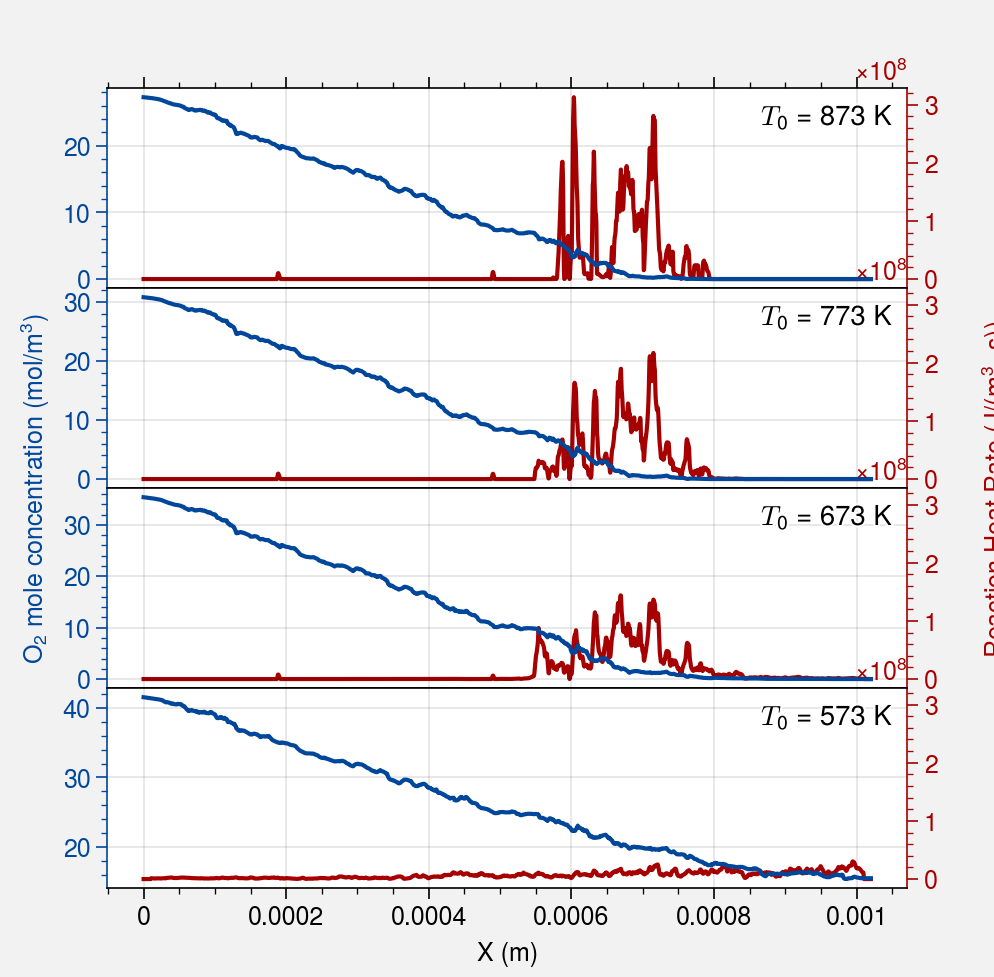

In [22]:
c1 = plot.scale_luminance('cerulean', 0.5)
c2 = plot.scale_luminance('red', 0.5)

fig, axs = plot.subplots(ncols=1, nrows=4,aspect=(4, 1), axwidth=4, hspace=(0, ),sharex=3,sharey=3)

axs_r=axs.alty()
fig.text(0.985, 0.5, "Reaction Heat Rate (J/(m$^3\cdot$s))", color=c2, va='center', rotation='vertical')


axs[0].plot(df_transverse_case_T873["x"],df_transverse_case_T873["O2Conc"],color=c1)
axs_r[0].plot(df_transverse_case_T873["x"],df_transverse_case_T873["Qdot"],color=c2)
axs[0].format(title="$\mathit{T}_{0}$ = 873 K",titleloc='ur')
# axs[0].legend()

axs[1].plot(df_transverse_case_T773["x"],df_transverse_case_T773["O2Conc"],color=c1)
axs_r[1].plot(df_transverse_case_T773["x"],df_transverse_case_T773["Qdot"],color=c2)
axs[1].format(title="$\mathit{T}_{0}$ = 773 K",titleloc='ur')
# axs[1].legend()

axs[2].plot(df_transverse_case_T673["x"],df_transverse_case_T673["O2Conc"],color=c1)
axs_r[2].plot(df_transverse_case_T673["x"],df_transverse_case_T673["Qdot"],color=c2)
axs[2].format(title="$\mathit{T}_{0}$ = 673 K",titleloc='ur')
# axs[2].legend()

axs[3].plot(df_transverse_case_T573["x"],df_transverse_case_T573["O2Conc"],color=c1)
axs_r[3].plot(df_transverse_case_T573["x"],df_transverse_case_T573["Qdot"],color=c2)
axs[3].format(title="$\mathit{T}_{0}$ = 573 K",titleloc='ur')
# axs[3].legend()


axs[0].format(xtickloc='top')
axs.format(xlabel="X (m)",ylabel="O$_2$ mole concentration (mol/m$^3$)",ycolor=c1)
axs_r[3].get_shared_y_axes().join(axs_r[3], axs_r[2])
axs_r[3].get_shared_y_axes().join(axs_r[3], axs_r[1])
axs_r[3].get_shared_y_axes().join(axs_r[3], axs_r[0])

axs_r.format(ylabel='',ycolor=c2)


# axs_r.autoscale(tight=True)
fig.savefig('./Combustion front behavoirs.jpg', dpi=600,bbox_inches='tight')

## Comments 
- With the increasing the firing temperature, the combustion control regime change from the kiniteics-limited to the diffusion-limited with the combustion front narrowed down 